
# Получение данных через API 
  


 <center><img src="https://cdn.skyeng.ru/resources/image/skills/python/lesson1-1/3.png" /> 

## API с аутентификацей

Не ко всем API можно свободно подключаться. Владельцы некоторых из них хотят контролировать (и ограничивать), к какой части информации пользователи API имеют доступ, в каком объеме и с какой частотой скачивают данные. Также ограничения — это инструмент монетизации в платных API.

Для работы с закрытыми API чаще необходимо получить один или несколько токенов через отдельную регистрацию или запрос. 

- в некоторых токены станут доступны сразу же (API ВКонтакте) 
- в некоторых после верификации данных (Facebook API)
- для некоторых нужно ждать неделями (Instagram API)
- некоторые станут доступны после оплаты (Ahrefs API)

## API ВКонтакте

API ВКонтакте позволяет получать информацию из базы данных vk.com.

Документация VK API: https://vk.com/dev/first_guide

### Первые шаги

1. Регистрация во ВКонтакте
2. Регистрация приложения
3. Получение токена
4. Выбор нужного метода из документации
5. Получение информации об ограничениях
6. Создание запроса из нашего кода

### Регистрация приложения

Приложение в нашем случае — это способ организации доступа к `VK API`. Приложением будет выступать написанный нами позже код на Python.

А теперь:

1. Переходим на https://vk.com/apps?act=manage

2. Нажимаем на кнопку «Создать»

3. Даем любое название, по которому можно будет понять задачу нашего приложения

4. Выбираем standalone-приложение и нажимаем «Подключить приложение»


![](https://sun9-18.userapi.com/impg/VGeDRWJKW_6Ms7BbOtCh41jzxldbcy6JwH95eQ/0e1pkdiNjhA.jpg?size=1059x443&quality=96&proxy=1&sign=454bf7f014e41afb22452cc141e350e8&type=album)

5. Подтверждаем действия, если ВКонтакте попросит об этом.

![](https://sun9-71.userapi.com/impg/Fg_6i5-dnzrjNZbTDvYo4afGAGUyTsEBqT4-5A/TgzgFDE7FG0.jpg?size=721x558&quality=96&proxy=1&sign=6569b68b88f82836442859cf84852c68&type=album)

6. Переходим в Настройки и выполняем 4 изменения.

- Переводим *Состояние* в «Приложение включено и видно всем» 
- Включаем Open API
- В поле *Адрес сайта* вводим http://localhost
- В поле *Базовый домен* вводим localhost


![](https://sun9-74.userapi.com/impg/p6WT5FiQI0AYuWv6pP-7w6Xzmeb596jMfsgMTA/jJ0dX5H1f_s.jpg?size=995x634&quality=96&proxy=1&sign=824383999fb423776195beab10a1325d&type=album)

7. Сохраняем изменения

8. Копируем ID приложения

### Получение токена

**Токены** — это ключи доступа к API. Они используются для авторизации при запросах к API.

[Подробнее](https://vk.com/dev/access_token?f=3.%20%D0%A1%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D0%BD%D1%8B%D0%B9%20%D0%BA%D0%BB%D1%8E%D1%87%20%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF%D0%B0) про ключ доступа.

Нужный нам для работы токен называется `access_token`

1. Берем скопированный ID приложения и копируем его в ссылку

https://oauth.vk.com/authorize?client_id=1&display=page&scope=stats,offline&response_type=token&v=5.103&state=123456

вставьте ID **вашего** приложения после `client_id=`   вместо 1

2. Копируем получившуюся ссылку в адресную строку браузера и переходим по ней

3. Разрешаем доступ

![](https://sun9-22.userapi.com/impg/Ge3hmX3c5G0ww_FGQ52A2HEvL1i-DdETmVlpEQ/efhXNMjvQp8.jpg?size=713x298&quality=96&proxy=1&sign=41d48cddade7ffc78ad0418faae16a4f&type=album)

5. Копируем и сохраняем `access_token` из адреса страницы.

![](https://sun9-69.userapi.com/impg/r6_UMpqmTxoCgmAdnARizkdgV4SjKFv9wzPqOg/FcyMjHPxEwA.jpg?size=1057x125&quality=96&proxy=1&sign=4a2264a7b9fc19e02904b8d6b1616ddc&type=album)

### Предостережение

Не передавайте токены другим людям и не публикуйте их в интернете. Токен имеет такую же силу, как логин и пароль. Владея токеном можно получить доступ к вашему аккаунту и совершать действия от вашего имени.

**Свой токен мы сохранили в текстовый файл `my_token.py`, который лежит в той же папке, что и этот Jupyter notebook.**

### Выбор метода

Чтобы выбрать метод API ВКонтакте, определитесь, информацию о каких объектах вы хотели бы получить. Если о пользователях, то выбирайте группу методов объекта [Users](https://vk.com/dev/users), если информацию о группах и сообществах, то [Groups](https://vk.com/dev/groups) и т. д.

### Создание запроса

Любой запрос к API ВКонтакте состоит из 4 частей:

1. [метода API](https://vk.com/dev/methods) (обязательно) 
2. параметров (опционально)
3. access_token (обязательно)
4. [версия API](https://vk.com/dev/versions) (обязательно)
    
Мы будем использовать библиотеку `requests` для `GET-запросов`, метод API будет частью URL-адреса, а токен, версия API и опциональные параметры будут передаваться в словаре `params`.

### Ограничения

Справка: [Ограничения и рекомендации](https://vk.com/dev/api_requests?f=3.%20%D0%9E%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B8%20%D1%80%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%86%D0%B8%D0%B8)

Самым главным ограничением является частота обращения к API — **не более 3 запросов в секунду.**

Отдельные методы имеют свои ограничения на количество передаваемых данных в параметрах или на объем получаемых данных. В случае превышения лимита API будет выдавать специфические ошибки, которые можно найти в документации. [Коды ошибок](https://vk.com/dev/errors)

Частоту обращения и объем запроса нужно контролировать в вашем коде.

In [3]:
# читаем токен из файла my_token.py, куда мы сохранили access_token
from my_token import my_token as token



____
### Задача 1

Получить публичные данные о первом пользователе ВКонтакте

Поскольку речь идет о пользователе, то из всех методов нам больше подходит [`users.get`](https://vk.com/dev/users.get). Переходим в документацию, считываем информацию про параметры. 

In [ ]:
import requests
import pandas as pd

url = 'https://api.vk.com/method/users.get'
params = {
    'user_ids': '1',
    'access_token': token, # токен является обязательным параметром во всех запросах к vk
    'v':'5.89' # и версия api является обязательным параметром
}
res = requests.get(url, params=params)
res.json()

In [49]:
# или то же самое с библиотекой json

import requests
import pandas as pd
import json

url = 'https://api.vk.com/method/users.get'
params = {
    'user_ids': '1',
    'access_token': token, # токен — обязательный параметр во всех запросах к vk
    'v':'5.89' # и версия api обязательный параметр
}
response = requests.get(url, params=params)
response_dict = json.loads(response.content)
response_dict

{'response': [{'first_name': 'Павел',
   'id': 1,
   'last_name': 'Дуров',
   'can_access_closed': True,
   'is_closed': False}]}

Передав больше параметров, мы получим больше данных

In [50]:
url = 'https://api.vk.com/method/users.get'
params = {
    'user_id': '1',
    'access_token': token,
    'v':'5.89',
    'fields': 'photo_200_orig,sex,education' # Передадим дополнительные параметры. Если данных нет, то их нам не вернут в ответе
}
response = requests.get(url, params=params)
response_dict = json.loads(response.content)
response_dict

{'response': [{'first_name': 'Павел',
   'id': 1,
   'last_name': 'Дуров',
   'can_access_closed': True,
   'is_closed': False,
   'sex': 2,
   'photo_200_orig': 'https://sun1-20.userapi.com/s/v1/if1/SxVMWGSTbiGm8BS2QXHOK_VaW5tNI2efWY4rvRnadsrovHOk5V_bkzTJBBok_RqFuALUtD-_.jpg?size=200x226&quality=96&crop=35,30,897,1014&ava=1'}]}

### Задача 2

Мы хотим разместить рекламу о нашем курсе по анализу данных в тематических сообществах. Нужно получить список 100 самых посещаемых групп/страниц по поисковому запросу "python" и дополнительную информацию о них: название, количество пользователей, количество постов

0. Понять, какие методы нам нужны!

1. Найти группы
2. Получить количество подписчиков в группах
3. Получить количество постов

Идем в документацию: https://vk.com/dev/methods



Что нашли в документации:

1. Метод `groups.search`

2. Метод `groups.GetById`

3. Метод `wall.get`

### 1. Ищем группы

Задача поиска групп по разным запросам кажется довольно универсальной, да и Skills планирует запускать не один курс, так что сразу напишем функцию, которая будет находить группы по поисковому запросу при помощи метода [`groups.search`](https://vk.com/dev/groups.search)

In [51]:
def search_query(q, sorting=0): # Если не передать параметр sorting, то по умолчанию он будет равен 0

    #Параметры sort
    #0 — сортировать по умолчанию (аналогично результатам поиска в полной версии сайта);
    #1 — сортировать по скорости роста;
    #2 — сортировать по отношению дневной посещаемости к количеству пользователей;
    #3 — сортировать по отношению количества лайков к количеству пользователей;
    #4 — сортировать по отношению количества комментариев к количеству пользователей;
    #5 — сортировать по отношению количества записей в обсуждениях к количеству пользователей.
    params = {
        'q': q,                 # Поисковой запрос
        'access_token': token,
        'v':'5.89',
        'sort': sorting,
        'count': 100           # Просим отдать нам 100 записей, это максимум для обычного запроса
    }
    req = requests.get('https://api.vk.com/method/groups.search', params).json()
    req = req['response']['items']
    return req


python_communities = search_query('python', 2)
python_communities


[{'id': 152111071,
  'name': 'Python',
  'screen_name': 'python_django_programirovanie',
  'is_closed': 0,
  'type': 'group',
  'photo_50': 'https://sun1-30.userapi.com/s/v1/if1/A6k7o-6-9iusZf0ErItZASlQfDaGBHh3WE3eJ4qg9vgJA60dJqNHkHLebmyT3CgLNQSe1w.jpg?size=50x50&quality=96&crop=260,83,441,441&ava=1',
  'photo_100': 'https://sun1-30.userapi.com/s/v1/if1/dK46KN4rpXBdpyWLudIIh0tWjwx1benu9MHJfW0E8NAV7RVzpsl-0XfV_lCDiuyEVEsxcw.jpg?size=100x100&quality=96&crop=260,83,441,441&ava=1',
  'photo_200': 'https://sun1-30.userapi.com/s/v1/if1/mcfW5UzJJa9KBgL8AVS7BRLWLQgWrOyP_0rR9w1ZPIt7gGEdD7X1LS-x6-Vod3A9g69FgA.jpg?size=200x200&quality=96&crop=260,83,441,441&ava=1'},
 {'id': 52104930,
  'name': 'Python',
  'screen_name': 'we_use_python',
  'is_closed': 0,
  'type': 'page',
  'photo_50': 'https://sun1-84.userapi.com/s/v1/ig2/h7GKYzCcLikzLOADlIm8vMugyTU65hJ92O81SYLilqswIpUQbKgJp4r7MBKsPN3Uz5pzPANo5IklVANXoONyFMAG.jpg?size=50x50&quality=95&crop=0,0,2084,2084&ava=1',
  'photo_100': 'https://sun1-84.us

In [52]:
group_df = pd.DataFrame(python_communities)
group_df

,id,name,screen_name,is_closed,type,photo_50,photo_100,photo_200
0,152111071,Python,python_django_programirovanie,0,group,https://sun1-30.userapi.com/s/v1/if1/A6k7o-6-9...,https://sun1-30.userapi.com/s/v1/if1/dK46KN4rp...,https://sun1-30.userapi.com/s/v1/if1/mcfW5UzJJ...
1,52104930,Python,we_use_python,0,page,https://sun1-84.userapi.com/s/v1/ig2/h7GKYzCcL...,https://sun1-84.userapi.com/s/v1/ig2/9gH6ngpwa...,https://sun1-84.userapi.com/s/v1/ig2/gFkxohII1...
2,203955768,Python,club203955768,0,group,https://sun1-47.userapi.com/s/v1/ig2/a58f71md5...,https://sun1-47.userapi.com/s/v1/ig2/fULanORBh...,https://sun1-47.userapi.com/s/v1/ig2/J-YXna6XW...
3,205944229,Ваш первый код на Python (интенсив),club205944229,0,page,https://sun1-92.userapi.com/s/v1/ig2/Fl3VgrrNF...,https://sun1-92.userapi.com/s/v1/ig2/_11mBxmMd...,https://sun1-92.userapi.com/s/v1/ig2/Lk4NiHD9y...
4,204886867,Bot_Python,mpei_python,0,group,https://sun1-27.userapi.com/s/v1/ig2/t0Mf77Fr4...,https://sun1-27.userapi.com/s/v1/ig2/IWogxRm0P...,https://sun1-27.userapi.com/s/v1/ig2/3DSwMnCWq...
...,...,...,...,...,...,...,...,...
95,195677045,MrD || Godot Engine || Python,youtube_mrd,0,group,https://sun1-23.userapi.com/s/v1/ig1/s9wnwZm9q...,https://sun1-23.userapi.com/s/v1/ig1/1ghdFlmPt...,https://sun1-23.userapi.com/s/v1/ig1/7ERgBWC2q...
96,136323479,Monty Python для чайников,montyteapot,0,page,https://sun1-96.userapi.com/s/v1/if1/5Y2Z5OOx9...,https://sun1-96.userapi.com/s/v1/if1/3gz_aAifc...,https://sun1-96.userapi.com/s/v1/if1/upVpizvkK...
97,207644554,Учимся делать телеграмм-ботов на Python,python_74,0,event,https://sun1-91.userapi.com/s/v1/ig2/kCfYcXvmH...,https://sun1-91.userapi.com/s/v1/ig2/fprTAFyyS...,https://sun1-91.userapi.com/s/v1/ig2/BR8U72gWS...
98,186684823,Школа программирования на Python,club186684823,0,group,https://vk.com/images/community_50.png,https://vk.com/images/community_100.png,https://vk.com/images/community_200.png


### 2. Найдем количество подписчиков для каждой группы

Запросим количество подписчиков всех выбранных групп одним запросом через метод [`groups.getById`](https://vk.com/dev/groups.getById)


Для этого нам нужно передать в парметры запроса строку с ID групп. Создадим ее для начала:



In [53]:
groups_ids = ''  # сформируем строку с ID групп через запятую

for x in group_df['id']:
    groups_ids += str(x) # Преобразуем ID из числа в строку
    groups_ids += ', '

groups_ids

'152111071, 52104930, 203955768, 205944229, 204886867, 207899503, 207918833, 206321561, 177962775, 164946472, 172288069, 174948538, 69235007, 194576836, 206927664, 21036475, 26227, 205591291, 13765414, 207174894, 196217008, 203595919, 97789166, 208747394, 207729799, 207517248, 207585629, 207516395, 3183750, 7173546, 42565717, 41943023, 207520578, 207642587, 206098555, 113913953, 8056712, 200550131, 185939737, 11899736, 205988839, 149218373, 183738581, 196955683, 206891948, 125409792, 199032931, 193480984, 172171969, 198313397, 207899501, 200252788, 82481391, 163875533, 75836319, 507513, 55702386, 43690334, 85879138, 142410745, 38080744, 145881591, 107124511, 55578525, 89085936, 414329, 41069912, 142555723, 174586137, 202531389, 64524646, 181513077, 200274205, 140154120, 12299085, 63204808, 101849308, 44437312, 201595704, 193182824, 156528136, 132490011, 178774705, 178733625, 138576816, 69108280, 181436014, 31926731, 195194058, 196767, 88752455, 96761545, 186562266, 187751104, 77958696,

Мы подготовили список id групп, информация о которых нам интересна. Теперь нужно дописать запрос к API ВК, который вернет данные с описанием, `description`, и количеством подписчиков `members_count`.


In [54]:
url_data = 'https://api.vk.com/method/groups.getById'

params = {
    'access_token': token, # токен
    'v':'5.89', # версия
    'group_ids': groups_ids, # список ID групп
    'fields':  'members_count,description' # здесь мы передали дополнительные параметры групп
}

req = requests.get(url_data, params) # сформировали запрос
req.content

b'{"response":[{"id":152111071,"name":"Python","screen_name":"python_django_programirovanie","is_closed":0,"type":"group","photo_50":"https:\\/\\/sun1-30.userapi.com\\/s\\/v1\\/if1\\/A6k7o-6-9iusZf0ErItZASlQfDaGBHh3WE3eJ4qg9vgJA60dJqNHkHLebmyT3CgLNQSe1w.jpg?size=50x50&quality=96&crop=260,83,441,441&ava=1","photo_100":"https:\\/\\/sun1-30.userapi.com\\/s\\/v1\\/if1\\/dK46KN4rpXBdpyWLudIIh0tWjwx1benu9MHJfW0E8NAV7RVzpsl-0XfV_lCDiuyEVEsxcw.jpg?size=100x100&quality=96&crop=260,83,441,441&ava=1","photo_200":"https:\\/\\/sun1-30.userapi.com\\/s\\/v1\\/if1\\/mcfW5UzJJa9KBgL8AVS7BRLWLQgWrOyP_0rR9w1ZPIt7gGEdD7X1LS-x6-Vod3A9g69FgA.jpg?size=200x200&quality=96&crop=260,83,441,441&ava=1","description":"python django flask\\n\\nPython \xe2\x80\x94 \xd0\xb2\xd1\x8b\xd1\x81\xd0\xbe\xd0\xba\xd0\xbe\xd1\x83\xd1\x80\xd0\xbe\xd0\xb2\xd0\xbd\xd0\xb5\xd0\xb2\xd1\x8b\xd0\xb9 \xd1\x8f\xd0\xb7\xd1\x8b\xd0\xba \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb3\xd1\x80\xd0\xb0\xd0\xbc\xd0\xbc\xd0\xb8\xd1\x80\xd0\xbe\xd0\xb2\xd0\xb

Создадим дата-фрейм с данными количества подписчиков в переменной `groups_members_df` и отсортируем по количеству подписчиков

In [55]:
res = req.json()['response']

groups_members_df = pd.DataFrame(res).sort_values('members_count', ascending=False) 
groups_members_df.head()

,id,name,screen_name,is_closed,type,photo_50,photo_100,photo_200,description,members_count
28,3183750,"Веб программист - PHP, JS, Python, Java, HTML 5",php2all,0,page,https://sun1-30.userapi.com/s/v1/if1/zeGJuq9jw...,https://sun1-30.userapi.com/s/v1/if1/QN2krLbUY...,https://sun1-30.userapi.com/s/v1/if1/kUJTHNoBD...,Самое крупное сообщество веб программистов вко...,96162
30,42565717,Python,club42565717,0,group,https://sun1-24.userapi.com/s/v1/if1/4AbXUc5Av...,https://sun1-24.userapi.com/s/v1/if1/mymE3-PLo...,https://sun1-24.userapi.com/s/v1/if1/cdlic5jzd...,,54618
82,178774705,"Языки программирования: Python, Java, JS, PHP…",pryaz,0,page,https://sun1-20.userapi.com/s/v1/if1/jnemAAH8P...,https://sun1-20.userapi.com/s/v1/if1/GCKYp49sW...,https://sun1-20.userapi.com/s/v1/if1/D690Zn4tV...,,36713
39,11899736,"Видеоуроки программиста PHP,Javascript,Python,С#",programl,0,page,https://sun1-22.userapi.com/s/v1/if1/iqC6SogAN...,https://sun1-22.userapi.com/s/v1/if1/RZcjV0Jvl...,https://sun1-22.userapi.com/s/v1/if1/dN17dsNV0...,"Видеоуроки по PHP , JS , Mysql , Python, Java ...",36042
59,142410745,Python 3.10 | ЯПрограммист,open_sourcecode,0,page,https://sun1-28.userapi.com/s/v1/if1/Q7ObDQ3pi...,https://sun1-28.userapi.com/s/v1/if1/tASAZBFQS...,https://sun1-28.userapi.com/s/v1/if1/H3Fe6O4OS...,,35189


###  3. Получим количество постов в каждой группе

Информацию о постах можно получить из метода [`wall.get`](https://vk.com/dev/wall.get), который возвращает информацию о числе всех записей в группе при первом запросе.

Сформируем запрос с помощью функции `get()` библиотеки `requests`, передав ей необходимые аргументы.

In [56]:
url_data = 'https://api.vk.com/method/wall.get'

params = {'access_token': token,
          'v':'5.89',
          'owner_id': '-' + str(3183750),   # Таким интересным способом согласно документации передается ID группы
          'filter': 'all'  # Берём все посты

        }
req = requests.get(url_data, params)
res = req.json()
res

{'response': {'count': 54831,
  'items': [{'id': 360884,
    'from_id': -3183750,
    'owner_id': -3183750,
    'date': 1638123292,
    'marked_as_ads': 0,
    'post_type': 'post',
    'text': 'Обучение SQL \n  \n 1. Простые запросы SQL (INSERT, SELECT, UPDATE, DELETE) \n 2. Урок по SQL ALTER TABLE, Псевдонимы SQL \n 3. Строчные функции SQL, lower, Upper, Concat и другие \n 4. Ключевые слова в SQL, BETWEET, LIKE и другие \n 5. Работа с SQL: создание таблиц, ключей и JOIN-запросы \n 6. Работа с SQL IN и SQL NOT IN \n 7. Работа с SQL JOIN (NATURAL JOIN, LEFT and RIGHT JOIN) \n  \n #video   #sql   \n  \n \n #video@php2all  больше видео в нашем каталоге https://vk.com/videos-3183750',
    'is_pinned': 1,
    'attachments': [{'type': 'video',
      'video': {'access_key': 'c35413ae4b4ae7adc8',
       'can_comment': 1,
       'can_like': 1,
       'can_repost': 1,
       'can_subscribe': 1,
       'can_add_to_faves': 1,
       'can_add': 1,
       'date': 1591029330,
       'description': 'З

Теперь нам нужно применить этот запрос к каждой группе. Логично сделать это в цикле.

Так как в цикле мы будем отправлять много запросов, нужно подготовиться и зашить в код время перерывов. Для этого мы импортируем библиотеку `time`, в которой есть функция `time.sleep()`, в скобках ей передадим `0,5`, то есть один запрос в полсекунды. 


In [57]:
import time

In [58]:
import time # чтобы спать

post_counts = []  # В этот список будем последовательно записывать информацию о количестве записей в каждой из групп

for group_id in groups_members_df['id']:

    url_data = 'https://api.vk.com/method/wall.get'

    params = {'access_token': token,
          'v':'5.89',
          'owner_id': '-' + str(group_id),   # Таким интересным способом согласно документации передается ID группы
          'filter': 'all'  # Берем все посты
            }
    req = requests.get(url_data, params)
    res = req.json()
    
    try: # пробуем выполнить код
        count = res['response']['count'] # присваиваем значение ключа 'count' из словаря 'response', полученным в ответе на запрос
        post_counts.append(count) # добавляем значение в список с количеством записей
    except: # если вылетает ошибка, делаем то, что в except — присваиваем значение ноль
        post_counts.append(0)
    
    time.sleep(0.5) # Ограничиваем частоту запросов до одного запроса в полсекунды

Забираем нужные колонки и добавляем новую колонку с количеством постов

In [59]:
groups_members_df = groups_members_df[['id', 'name', 'screen_name', 'members_count', 'description']] 
groups_members_df['posts'] = post_counts
groups_members_df

,id,name,screen_name,members_count,description,posts
28,3183750,"Веб программист - PHP, JS, Python, Java, HTML 5",php2all,96162,Самое крупное сообщество веб программистов вко...,54831
30,42565717,Python,club42565717,54618,,910
82,178774705,"Языки программирования: Python, Java, JS, PHP…",pryaz,36713,,67
39,11899736,"Видеоуроки программиста PHP,Javascript,Python,С#",programl,36042,"Видеоуроки по PHP , JS , Mysql , Python, Java ...",26362
59,142410745,Python 3.10 | ЯПрограммист,open_sourcecode,35189,,464
...,...,...,...,...,...,...
50,207899501,Python для начинающих лицей 239 (2021-2022),club207899501,17,,0
24,207729799,ЦДЮТТ Основы Python,cdutt_python,16,Программа дополнительного образования Основы п...,0
33,207642587,Python-online 21/22 Ковтунова,python_online_mopevm21_22,15,Цель\n\nОбучение алгоритмизации и программиров...,0
97,207644554,Учимся делать телеграмм-ботов на Python,python_74,13,Приглашаем вас на бесплатный пробный урок по «...,2


Проверим, что за группы по количеству подписчиков нам попались

<AxesSubplot:>

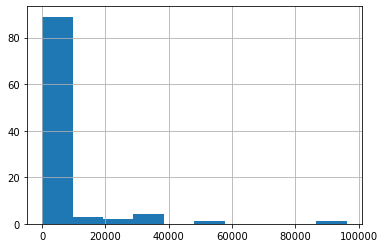

In [60]:
groups_members_df['members_count'].hist(bins=10)

___

### Задача 3



Мы хотим запустить таргетированную рекламу онлайн-уроков по английскому языку/программированию для детей на 10 городов РФ. Чтобы выбрать эти города, нам нужно знать, где живет наша целевая аудитория. Найдем 10 самых частотных городов проживания участников сообщества [Skysmart](https://vk.com/skysmart_pro_teen)

Нам нужно получить данные всех участников сообщества. Для этого есть метод [`groups.getMembers`](https://vk.com/dev/groups.getMembers) 

С параметром `'count'` можем получить максимум 1000

In [61]:
url = 'https://api.vk.com/method/groups.getMembers'
params = {
        'group_id': 'skysmart',
        'access_token': token,
        'v':'5.89',
        'fields': 'city',
        'count': 1000
      
    }
    
req = requests.get(url, params=params)
res = req.json()

print('Кол-во участников:', len(pd.DataFrame(res['response'])))

Кол-во участников: 1000


Нам на помощь придет смещение `offset`, которое работает как перелистывание страниц в книге, где на каждой странице 1000 записей. Передавая в цикле увеличенный `offset` на максимальное количество записей, мы каждый раз будем получать новую порцию следующих записей.

In [62]:
# pd.set_option('max_colwidth', None)  
# Если хотите видеть всё содержимое ячеек в датафрейме, выполните эту команду с настройкой


offset = 0
max_count = 1000
members = pd.DataFrame()

while True:      # Повторять цикл пока его не остановят по условию ниже
    
    url = 'https://api.vk.com/method/groups.getMembers'
    params = {
        'group_id': 'skysmart',
        'access_token': token,
        'v':'5.89',
        'fields': 'city',
        'count': max_count,
        'offset': offset
    }
    
    req = requests.get(url=url, 
                       params=params)
    res = req.json()
    
    if len(res['response']['items']) != 0:      # Проверяем вернулись ли нам хоть какие-нибудь записи
        members = pd.concat([members, pd.DataFrame(res['response']['items'])]) 
    else:
        break                                   # Если нам ничего не вернулось, то прервать цикл
    print('Уже скачано', offset, 'участников')
    offset = offset + max_count                 # Смещаем offset на число возвращенных записей
    time.sleep(0.5)                             # Опять контролируем частоту запросов, чтобы нас не ограничили

print('Кол-во участников:', len(members))

Уже скачано 0 участников
Уже скачано 1000 участников
Уже скачано 2000 участников
Уже скачано 3000 участников
Уже скачано 4000 участников
Уже скачано 5000 участников
Уже скачано 6000 участников
Уже скачано 7000 участников
Уже скачано 8000 участников
Уже скачано 9000 участников
Уже скачано 10000 участников
Уже скачано 11000 участников
Уже скачано 12000 участников
Уже скачано 13000 участников
Уже скачано 14000 участников
Уже скачано 15000 участников
Уже скачано 16000 участников
Уже скачано 17000 участников
Уже скачано 18000 участников
Уже скачано 19000 участников
Уже скачано 20000 участников
Уже скачано 21000 участников
Уже скачано 22000 участников
Уже скачано 23000 участников
Уже скачано 24000 участников
Уже скачано 25000 участников
Уже скачано 26000 участников
Уже скачано 27000 участников
Уже скачано 28000 участников
Уже скачано 29000 участников
Уже скачано 30000 участников
Уже скачано 31000 участников
Уже скачано 32000 участников
Уже скачано 33000 участников
Уже скачано 34000 участнико

Из всей информации об участниках нам нужны только города, так что можем забрать одну колонку и работать уже с ней.

1. Удалим пустые строки
2. Вытащим только название города с помощью `lambda` функции
3. Сгруппируем и посчитаем количество вхождений
4. Отсортируем по убыванию

In [63]:
cities =  members.city.dropna().apply(lambda x: x.get('title', None)).reset_index()

cities.groupby('city').count().sort_values('index', ascending = False).head(10)

,index
city,
Москва,3609
Санкт-Петербург,2371
Екатеринбург,633
Новосибирск,567
Краснодар,566
Нижний Новгород,496
Казань,474
Ростов-на-Дону,461
Челябинск,443


 <center><img src="https://cdn.skyeng.ru/resources/image/skills/python/lesson1-1/3.png" /> 